In [1]:
# Import necessary libraries
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Set random seed for reproducibility
RANDOM_SEED = 42

In [6]:
# Define paths for dataset and model save locations
dataset_path = 'keypoint.csv'  # Update the path accordingly
labels_path = 'keypoint_label.csv'
model_save_path = 'model/model.keras'

In [7]:
# Define number of classes (update based on your dataset)
NUM_CLASSES = 10

In [8]:
# Load dataset
X_dataset = np.loadtxt(dataset_path, delimiter=',', dtype='float32')
y_dataset = np.loadtxt(labels_path, delimiter=',', dtype='int32')

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)


In [10]:

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)



In [11]:
# Model building
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,066 (66.66 KB)

 Trainable params: 16,618 (64.91 KB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=model/model.h5

In [31]:
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1, restore_best_weights=True)


In [32]:
# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, verbose=1)


Epoch 1/1000
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1131 - loss: 2.3376
Epoch 1: saving model to model/model.weights.h5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1201 - loss: 2.3264 - val_accuracy: 0.1426 - val_loss: 2.2244
Epoch 2/1000
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1772 - loss: 2.2260 
Epoch 2: saving model to model/model.weights.h5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1787 - loss: 2.2236 - val_accuracy: 0.1969 - val_loss: 2.1316
Epoch 3/1000
25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2211 - loss: 2.1525 
Epoch 3: saving model to model/model.weights.h5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2237 - loss: 2.1495 - val_accuracy: 0.2557 - val_loss: 2.0344
Epoch 4/1000
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2594 - loss: 2.0845 
Epoch 4: saving model to model/model.weights.h5
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2604 - loss: 2.0826 - val_accuracy: 0.3806 - val_loss: 1.8945
E

In [36]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
# Model training
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback, lr_scheduler]
)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - loss: 0.9178 


In [38]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

In [39]:
# Load the best model
model = tf.keras.models.load_model(model_save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[0.00985461 0.0058049  0.01545721 0.00518384 0.15032043 0.02837284
 0.05273076 0.64089197 0.07469459 0.01668887]
7


In [40]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

In [41]:

# Function to print confusion matrix
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


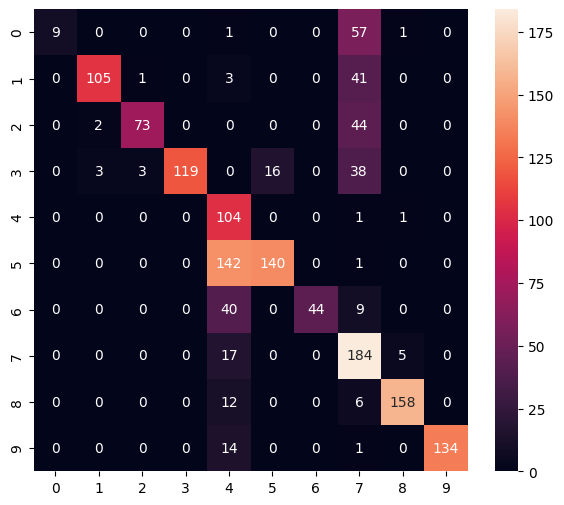

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.13      0.23        68
           1       0.95      0.70      0.81       150
           2       0.95      0.61      0.74       119
           3       1.00      0.66      0.80       179
           4       0.31      0.98      0.47       106
           5       0.90      0.49      0.64       283
           6       1.00      0.47      0.64        93
           7       0.48      0.89      0.63       206
           8       0.96      0.90      0.93       176
           9       1.00      0.90      0.95       149

    accuracy                           0.70      1529
   macro avg       0.86      0.67      0.68      1529
weighted avg       0.85      0.70      0.71      1529



In [42]:
# Predicting on the test set
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

In [43]:
# Print confusion matrix
print_confusion_matrix(y_test, y_pred)

In [44]:
# Save the model without optimizer for inference
model.save(model_save_path, include_optimizer=False)


INFO:tensorflow:Assets written to: C:\Users\erand\AppData\Local\Temp\tmpy5hkgpks\assets


INFO:tensorflow:Assets written to: C:\Users\erand\AppData\Local\Temp\tmpy5hkgpks\assets


Saved artifact at 'C:\Users\erand\AppData\Local\Temp\tmpy5hkgpks'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2383398386576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383398386768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383398384272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383398385424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383398383888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2383459353808: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [45]:
# Convert the model to TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

9728

In [46]:
# Save the quantized model
open(tflite_save_path, 'wb').write(tflite_quantized_model)

In [47]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [48]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [49]:
# Perform inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [50]:
# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))


[0.00970634 0.00570632 0.0152207  0.00514076 0.16093144 0.03106064
 0.05398101 0.6220776  0.07823578 0.01793938]
7


In [ ]:
# Perform inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])


In [ ]:
# Print the results of TFLite model inference
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))